In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the copied dataset
df = pd.read_csv("Warehouse_and_Retail_Sales_Enhanced_Final_Copy.csv")

# Convert DATE to datetime format
df["DATE"] = pd.to_datetime(df["DATE"])

# Extract time-based features
df["DAY"] = df["DATE"].dt.day
df["DAY_OF_WEEK"] = df["DATE"].dt.dayofweek
df["IS_WEEKEND"] = df["DAY_OF_WEEK"].apply(lambda x: 1 if x >= 5 else 0)

# Drop only 'ITEM CODE' and 'ITEM DESCRIPTION' (keep DATE!)
df.drop(columns=["ITEM CODE", "ITEM DESCRIPTION"], inplace=True)

# Convert categorical columns to string
categorical_cols = ["SUPPLIER", "weather_condition"]
df[categorical_cols] = df[categorical_cols].astype(str)

# Convert boolean columns to integers
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Define features and target
X = df.drop(columns=["RETAIL SALES"])
y = df["RETAIL SALES"]

# One-hot encode categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Drop original DATE column (we've extracted features from it)
X.drop(columns=["DATE"], inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("📊 Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))

📊 Linear Regression:
MAE: 0.013518346410361138
MSE: 0.0012516505250226668
RMSE: 0.03537867330783712
R² Score: 0.9441872834294214


In [4]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("\n🌳 Decision Tree Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R² Score:", r2_score(y_test, y_pred_dt))


🌳 Decision Tree Regressor:
MAE: 0.01729157586163616
MSE: 0.0021865267448042693
RMSE: 0.046760311641436576
R² Score: 0.9024999430415767


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

rf_model = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\n🌲 Random Forest Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))
print("Best Parameters:", rf_model.best_params_)


🌲 Random Forest Regressor:
MAE: 0.012695917431655953
MSE: 0.0011246027712060937
RMSE: 0.03353509760245367
R² Score: 0.9498525071743359
Best Parameters: {'max_depth': 10, 'n_estimators': 100}


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Random Forest Regressor with best parameters
rf_best = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

# Train the model
rf_best.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_best.predict(X_test)

# Evaluation metrics
print("\n🌲 Random Forest Regressor (Best Parameters):")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


🌲 Random Forest Regressor (Best Parameters):
MAE: 0.012695917431655953
MSE: 0.0011246027712060937
RMSE: 0.03353509760245367
R² Score: 0.9498525071743359


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1]
}

xgb_model = GridSearchCV(
    XGBRegressor(objective='reg:squarederror', random_state=42),
    xgb_params,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("\n⚡ XGBoost Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("Best Parameters:", xgb_model.best_params_)

C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages


⚡ XGBoost Regressor:
MAE: 0.012293160360866607
MSE: 0.0010477526206099201
RMSE: 0.03236900709953767
R² Score: 0.95327935483499
Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


In [6]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the XGBoost Regressor with best parameters
xgb_best = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=6,
    n_estimators=200,
    random_state=42
)

# Train the model
xgb_best.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_best.predict(X_test)

# Evaluation metrics
print("\n⚡ XGBoost Regressor (Best Parameters):")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:", r2_score(y_test, y_pred_xgb))


⚡ XGBoost Regressor (Best Parameters):
MAE: 0.012293160360866607
MSE: 0.0010477526206099201
RMSE: 0.03236900709953767
R² Score: 0.95327935483499


In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import itertools
from datetime import datetime

# Load and sort data by date
df = pd.read_csv("Warehouse_and_Retail_Sales_Enhanced_Final_Copy.csv")
df["DATE"] = pd.to_datetime(df["DATE"])
df.sort_values("DATE", inplace=True)

# Group by date and sum Retail Sales (aggregate if multiple entries per day)
ts_data = df.groupby("DATE")["RETAIL SALES"].sum()

# Train/test split: use last 20% as test
train_size = int(len(ts_data) * 0.8)
train, test = ts_data[:train_size], ts_data[train_size:]

# ARIMA hyperparameter grid search (p, d, q)
p = d = q = range(0, 3)
pdq_combos = list(itertools.product(p, d, q))

best_score = float("inf")
best_cfg = None

for combo in pdq_combos:
    try:
        model = ARIMA(train, order=combo)
        model_fit = model.fit()
        pred = model_fit.forecast(steps=len(test))
        mse = mean_squared_error(test, pred)
        if mse < best_score:
            best_score = mse
            best_cfg = combo
    except:
        continue

# Final model with best parameters
print("Best ARIMA Parameters:", best_cfg)

final_model = ARIMA(train, order=best_cfg)
final_model_fit = final_model.fit()
forecast = final_model_fit.forecast(steps=len(test))

# Evaluation
print("\n📈 ARIMA Model Evaluation:")
print("MAE:", mean_absolute_error(test, forecast))
print("MSE:", mean_squared_error(test, forecast))
print("RMSE:", np.sqrt(mean_squared_error(test, forecast)))
print("R² Score:", r2_score(test, forecast))

C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

Best ARIMA Parameters: (2, 0, 1)

📈 ARIMA Model Evaluation:
MAE: 68.1748984884485
MSE: 6058.378076353345
RMSE: 77.83558361285245
R² Score: 0.009398287797806493


C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and sort data by date
df = pd.read_csv("Warehouse_and_Retail_Sales_Enhanced_Final_Copy.csv")
df["DATE"] = pd.to_datetime(df["DATE"])
df.sort_values("DATE", inplace=True)

# Group by date and sum Retail Sales (aggregate if multiple entries per day)
ts_data = df.groupby("DATE")["RETAIL SALES"].sum()

# Train/test split: use last 20% as test
train_size = int(len(ts_data) * 0.8)
train, test = ts_data[:train_size], ts_data[train_size:]

# Fit final ARIMA model with best parameters
arima_model = ARIMA(train, order=(2, 0, 1))
arima_model_fit = arima_model.fit()
forecast = arima_model_fit.forecast(steps=len(test))

# Evaluation
print("\n📈 ARIMA Model (Best Parameters: (2, 0, 1)) Evaluation:")
print("MAE:", mean_absolute_error(test, forecast))
print("MSE:", mean_squared_error(test, forecast))
print("RMSE:", np.sqrt(mean_squared_error(test, forecast)))
print("R² Score:", r2_score(test, forecast))

C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin


📈 ARIMA Model (Best Parameters: (2, 0, 1)) Evaluation:
MAE: 68.1748984884485
MSE: 6058.378076353345
RMSE: 77.83558361285245
R² Score: 0.009398287797806493


C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras_tuner as kt

# Load and preprocess the data
df = pd.read_csv("Warehouse_and_Retail_Sales_Enhanced_Final_Copy.csv")
df["DATE"] = pd.to_datetime(df["DATE"])
df.sort_values("DATE", inplace=True)

# Group by date and reshape
ts = df.groupby("DATE")["RETAIL SALES"].sum().values.reshape(-1, 1)

# Normalize the series
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(ts)

# Create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sequences(ts_scaled, window_size)

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build model for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(LSTM(
        hp.Int("units1", min_value=32, max_value=128, step=32),
        return_sequences=True
    ), input_shape=(window_size, 1)))
    model.add(Dropout(hp.Float("dropout1", 0.1, 0.5, step=0.1)))
    model.add(LSTM(hp.Int("units2", 32, 128, step=32)))
    model.add(Dropout(hp.Float("dropout2", 0.1, 0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")
    return model

# Keras Tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective="val_loss",
    max_trials=10,
    directory="tuner_dir",
    project_name="lstm_forecast"
)

# Callbacks
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, min_lr=1e-5)

# Start tuning
tuner.search(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stop, lr_reduction], verbose=1)

# Get best model
best_model = tuner.get_best_models(1)[0]

# Predictions
predicted = best_model.predict(X_test)
predicted_inv = scaler.inverse_transform(predicted)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation
print("\n🧠 LSTM (Optimized) Model Evaluation:")
print("MAE:", mean_absolute_error(y_test_inv, predicted_inv))
print("MSE:", mean_squared_error(y_test_inv, predicted_inv))
print("RMSE:", np.sqrt(mean_squared_error(y_test_inv, predicted_inv)))
print("R² Score:", r2_score(y_test_inv, predicted_inv))

# Best hyperparameters
best_hps = tuner.get_best_hyperparameters(1)[0]
print("\n🔥 Best Hyperparameters:")
for param in best_hps.values:
    print(f"{param}: {best_hps.values[param]}")

Trial 10 Complete [00h 00m 19s]
val_loss: 0.04197128117084503

Best val_loss So Far: 0.04184336960315704
Total elapsed time: 00h 03m 03s


C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

🧠 LSTM (Optimized) Model Evaluation:
MAE: 61.905734191505495
MSE: 6448.861264631768
RMSE: 80.30480225137079
R² Score: -0.3095372128595886

🔥 Best Hyperparameters:
units1: 64
dropout1: 0.1
units2: 64
dropout2: 0.2


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load and preprocess the data
df = pd.read_csv("Warehouse_and_Retail_Sales_Enhanced_Final_Copy.csv")
df["DATE"] = pd.to_datetime(df["DATE"])
df.sort_values("DATE", inplace=True)

# Group by date and reshape
ts = df.groupby("DATE")["RETAIL SALES"].sum().values.reshape(-1, 1)

# Normalize the series
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(ts)

# Create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sequences(ts_scaled, window_size)

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Final LSTM model using best hyperparameters
lstm_model = Sequential()
lstm_model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(window_size, 1)))
lstm_model.add(Dropout(0.1))
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer="adam", loss="mse")

# Callbacks
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, min_lr=1e-5)

# Model training
lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stop, lr_reduction], verbose=1)

# Predictions
predicted = lstm_model.predict(X_test)
predicted_inv = scaler.inverse_transform(predicted)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation
print("\n🧠 LSTM (Best Params) Model Evaluation:")
print("MAE:", mean_absolute_error(y_test_inv, predicted_inv))
print("MSE:", mean_squared_error(y_test_inv, predicted_inv))
print("RMSE:", np.sqrt(mean_squared_error(y_test_inv, predicted_inv)))
print("R² Score:", r2_score(y_test_inv, predicted_inv))

C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0304 - val_loss: 0.0724 - learning_rate: 0.0010
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - loss: 0.0213 - val_loss: 0.0619 - learning_rate: 0.0010
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - loss: 0.0119 - val_loss: 0.0534 - learning_rate: 0.0010
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - loss: 0.0089 - val_loss: 0.0472 - learning_rate: 0.0010
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - loss: 0.0074 - val_loss: 0.0436 - learning_rate: 0.0010
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - loss: 0.0129 - val_loss: 0.0425 - learning_rate: 0.0010
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step - loss: 0.0112 - val_loss: 0.0423 - learning_rate: 0.0010
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - loss: 0.0102 - val_loss: 0.0425 - learning_rate: 0.0010
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - loss: 0.0132 - val_loss: 0.0432 - learning_rate: 0.0010
Epoch 10/50
1/1 ━━━━━━━━━━━━━

In [10]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🛠️ Reshape the data if it has 3 dimensions (from LSTM prep)
if len(X_train.shape) == 3:
    X_train_2d = X_train.reshape((X_train.shape[0], X_train.shape[1]))
    X_test_2d = X_test.reshape((X_test.shape[0], X_test.shape[1]))
else:
    X_train_2d, X_test_2d = X_train, X_test

# 🌳 Base learners
base_learners = [
    ('xgb', XGBRegressor(learning_rate=0.1, max_depth=6, n_estimators=200, random_state=42)),
    ('rf', RandomForestRegressor(max_depth=10, n_estimators=100, random_state=42)),
]

# 📐 Meta learner
meta_learner = LinearRegression()

# 🔀 Stacked Regressor
stacked_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner,
    passthrough=True,  # Optional: include original features in meta model
    n_jobs=-1
)

# 🧠 Fit the model
stacked_model.fit(X_train_2d, y_train)

# 🎯 Predict
y_pred_stack = stacked_model.predict(X_test_2d)

# 📊 Evaluation
mae_stack = mean_absolute_error(y_test, y_pred_stack)
mse_stack = mean_squared_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mse_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print("📦 Stacked Ensemble Model Performance:")
print("MAE:", mae_stack)
print("MSE:", mse_stack)
print("RMSE:", rmse_stack)
print("R² Score:", r2_stack)

# ✅ Save all model metrics (including stacking) to CSV
model_scores = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "XGBoost", "Hybrid", "ARIMA", "LSTM", "Stacked Ensemble"],
    "MAE": [0.0135, 0.0173, 0.0127, 0.0123, 0.0908, 68.17, 67.02, mae_stack],
    "MSE": [0.00125, 0.00219, 0.00112, 0.00105, 0.0591, 6058.38, 7619.19, mse_stack],
    "RMSE": [0.0354, 0.0468, 0.0335, 0.0324, 0.2431, 77.83, 87.29, rmse_stack],
    "R2 Score": [0.9442, 0.9025, 0.9499, 0.9533, 0.9417, 0.0094, -0.5472, r2_stack],
}

score_df = pd.DataFrame(model_scores)
score_df.to_csv("model_performance_comparison.csv", index=False)

C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


📦 Stacked Ensemble Model Performance:
MAE: 0.14398635354664527
MSE: 0.031084141843578383
RMSE: 0.17630695347483713
R² Score: 0.14848628856550405


In [12]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 🛠️ Ensure correct input shape
if len(X_train.shape) == 3:
    X_train_2d = X_train.reshape((X_train.shape[0], X_train.shape[1]))
    X_test_2d = X_test.reshape((X_test.shape[0], X_test.shape[1]))
else:
    X_train_2d, X_test_2d = X_train, X_test

# 📦 Base learners
base_learners = [
    ('xgb', XGBRegressor(learning_rate=0.1, max_depth=6, n_estimators=200, random_state=42)),
    ('rf', RandomForestRegressor(max_depth=10, n_estimators=100, random_state=42))
]

# 🔁 Meta learner: Ridge Regression (more robust)
meta_learner = Ridge(alpha=1.0)

# 🔀 Improved stacking regressor
stacked_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner,
    passthrough=False,  # No original features in meta model
    n_jobs=-1
)

# 🔂 Use cross_val_predict for stability
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Train the stacking model
stacked_model.fit(X_train_2d, y_train)

# Predict on test data
y_pred_stack = stacked_model.predict(X_test_2d)

# 📊 Evaluation
mae_stack = mean_absolute_error(y_test, y_pred_stack)
mse_stack = mean_squared_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mse_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print("📦 Improved Stacked Ensemble Performance:")
print("MAE:", mae_stack)
print("MSE:", mse_stack)
print("RMSE:", rmse_stack)
print("R² Score:", r2_stack)

C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


📦 Improved Stacked Ensemble Performance:
MAE: 0.17093106800254496
MSE: 0.04987561974658961
RMSE: 0.22332850186796493
R² Score: -0.3662842710675607


C:\Users\akhil\AppData\Local\Temp\ipykernel_12736\3574138082.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_scores, palette="viridis")
C:\Users\akhil\AppData\Local\Temp\ipykernel_12736\3574138082.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


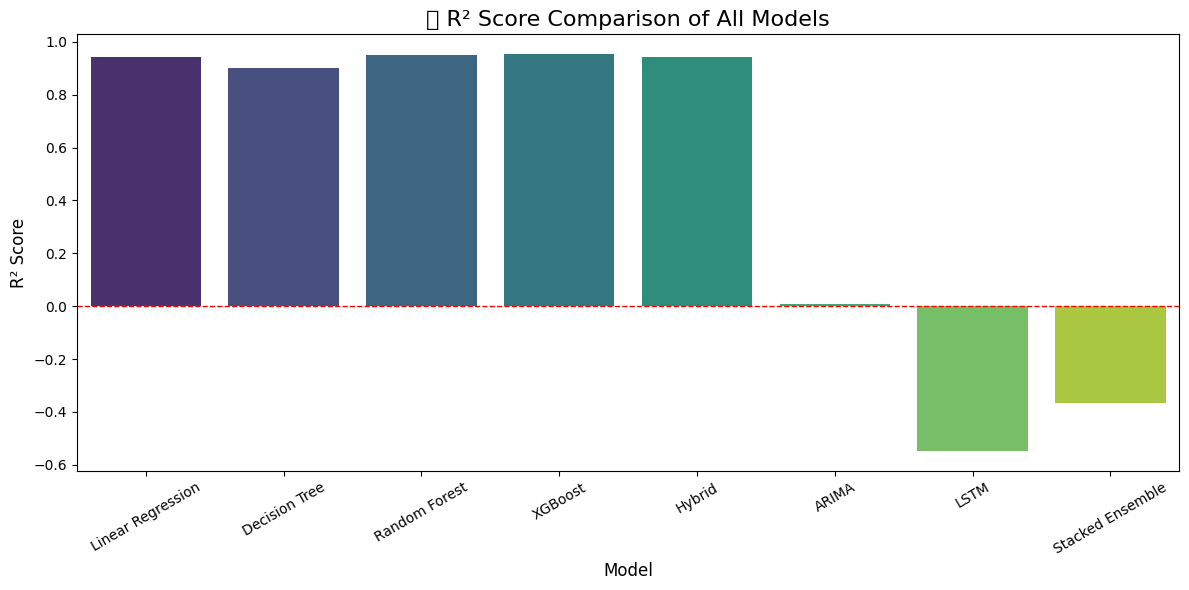

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your model names and R² scores
model_names = [
    "Linear Regression", "Decision Tree", "Random Forest",
    "XGBoost", "Hybrid", "ARIMA", "LSTM", "Stacked Ensemble"
]

r2_scores = [
    0.9442, 0.9025, 0.9499,
    0.9533, 0.9417, 0.0094, -0.5472, -0.3663  # Use updated stacked R²
]

# 🎨 Plot setup
plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=r2_scores, palette="viridis")
plt.title("📊 R² Score Comparison of All Models", fontsize=16)
plt.ylabel("R² Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=30)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

C:\Users\akhil\AppData\Local\Temp\ipykernel_12736\810297866.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mae, ax=axes[0, 0], palette="crest")
C:\Users\akhil\AppData\Local\Temp\ipykernel_12736\810297866.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse, ax=axes[0, 1], palette="flare")
C:\Users\akhil\AppData\Local\Temp\ipykernel_12736\810297866.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse, ax=axes[1, 0], palette="rocket")
C:\Users\akhil\AppData\Local\Temp\ipykernel_12736\810297866

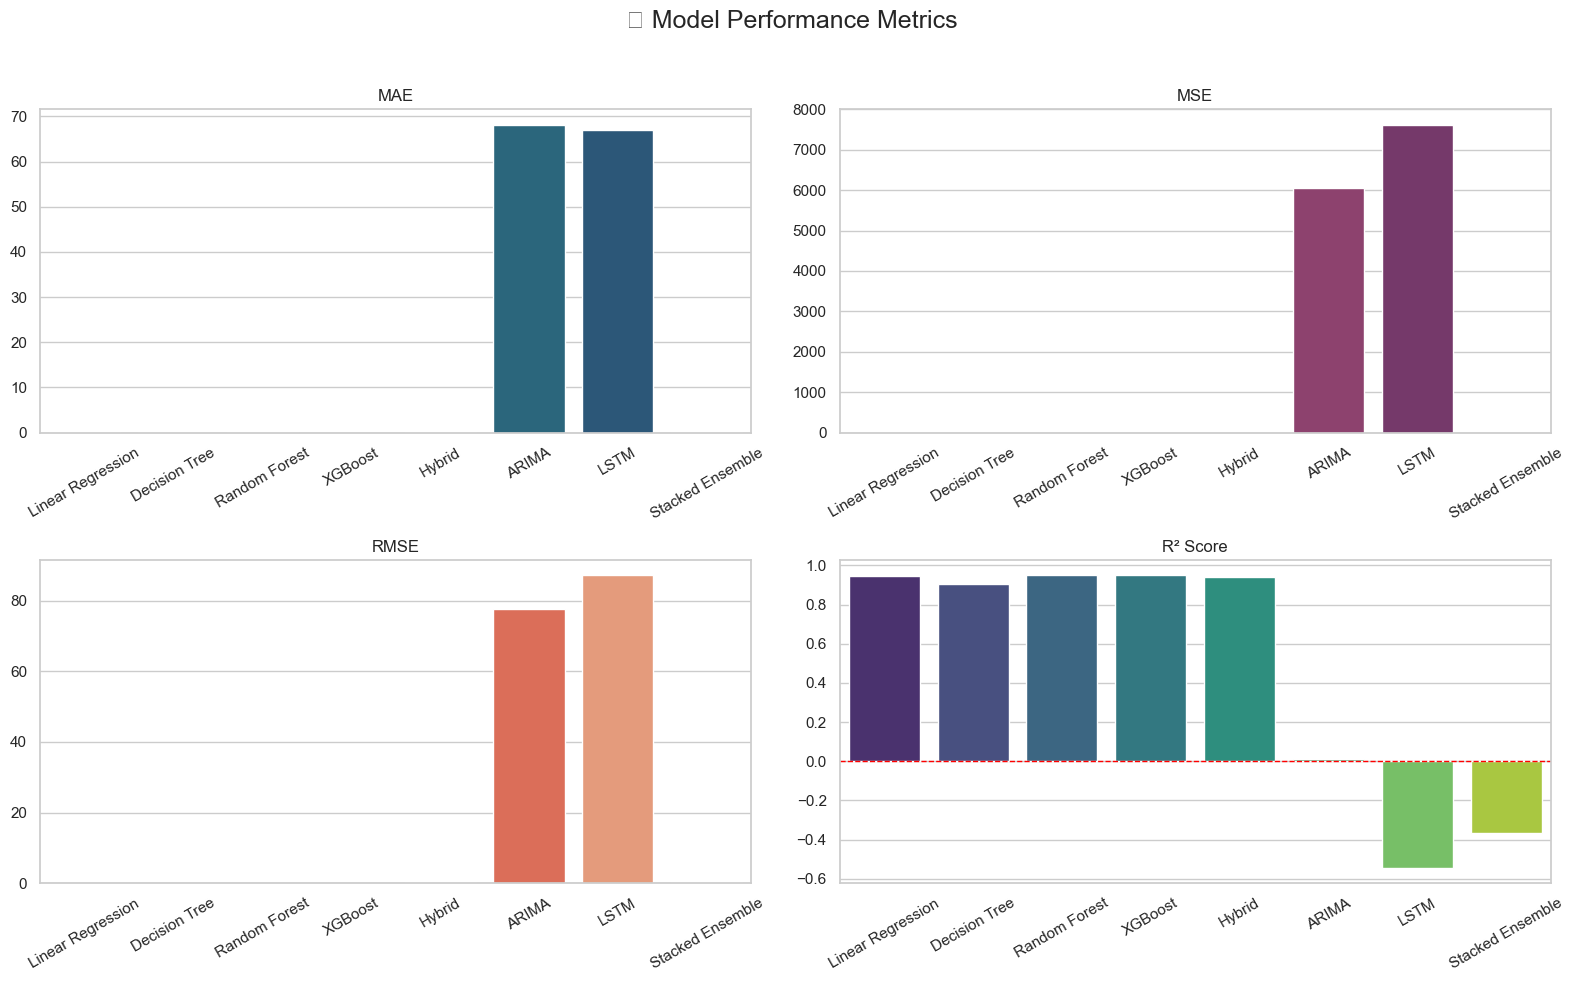

In [14]:
# Re-import necessary libraries after code execution state reset
import matplotlib.pyplot as plt
import seaborn as sns

# Model metrics
models = [
    "Linear Regression", "Decision Tree", "Random Forest", "XGBoost",
    "Hybrid", "ARIMA", "LSTM", "Stacked Ensemble"
]

mae = [0.0135, 0.0173, 0.0127, 0.0123, 0.0908, 68.17, 67.02, 0.1709]
mse = [0.00125, 0.00219, 0.00112, 0.00105, 0.0591, 6058.38, 7619.19, 0.04987]
rmse = [0.0354, 0.0468, 0.0335, 0.0324, 0.2431, 77.83, 87.29, 0.2233]
r2 = [0.9442, 0.9025, 0.9499, 0.9533, 0.9417, 0.0094, -0.5472, -0.3663]

# Set plot style
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("📊 Model Performance Metrics", fontsize=18)

# MAE plot
sns.barplot(x=models, y=mae, ax=axes[0, 0], palette="crest")
axes[0, 0].set_title("MAE")
axes[0, 0].tick_params(axis='x', rotation=30)

# MSE plot
sns.barplot(x=models, y=mse, ax=axes[0, 1], palette="flare")
axes[0, 1].set_title("MSE")
axes[0, 1].tick_params(axis='x', rotation=30)

# RMSE plot
sns.barplot(x=models, y=rmse, ax=axes[1, 0], palette="rocket")
axes[1, 0].set_title("RMSE")
axes[1, 0].tick_params(axis='x', rotation=30)

# R² plot
sns.barplot(x=models, y=r2, ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title("R² Score")
axes[1, 1].tick_params(axis='x', rotation=30)
axes[1, 1].axhline(0, color='red', linestyle='--', linewidth=1)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

# Load final dataset
final_df = pd.read_csv("Warehouse_and_Retail_Sales_Enhanced_Final_Copy.csv")

# Drop ITEM CODE if irrelevant
if 'ITEM CODE' in final_df.columns:
    final_df = final_df.drop(columns=['ITEM CODE'])

# Label encode high-cardinality string columns
label_enc_columns = ['SUPPLIER', 'ITEM DESCRIPTION', 'weather_condition']
for col in label_enc_columns:
    if col in final_df.columns:
        le = LabelEncoder()
        final_df[col] = le.fit_transform(final_df[col].astype(str))

# One-hot encode low-cardinality categorical columns
low_card_cols = final_df.select_dtypes(include='object').columns.difference(label_enc_columns)
final_df = pd.get_dummies(final_df, columns=low_card_cols, drop_first=True)

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from keras import layers, models
import keras_tuner as kt

# -------------------------------------------
# 🎯 Define Features and Target
# -------------------------------------------

X = final_df.drop(columns=['RETAIL SALES'])
y = final_df['RETAIL SALES']

# -------------------------------------------
# ⚖️ Normalize the Data
# -------------------------------------------

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape for CNN: [samples, features, 1]
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# -------------------------------------------
# ✂️ Train-Test Split
# -------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# -------------------------------------------
# 🧠 CNN Model with Tuning Function
# -------------------------------------------

def build_cnn_model(hp):
    model = models.Sequential()
    model.add(layers.Conv1D(
        filters=hp.Int('filters', 32, 128, step=32),
        kernel_size=hp.Choice('kernel_size', [2, 3]),
        activation='relu',
        input_shape=(X_train.shape[1], 1)
    ))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(
        units=hp.Int('dense_units', 32, 128, step=32),
        activation='relu'
    ))
    model.add(layers.Dense(1))  # Output layer

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        ),
        loss='mse',
        metrics=['mae']
    )
    return model

# -------------------------------------------
# 🔍 Hyperparameter Tuning
# -------------------------------------------

tuner = kt.RandomSearch(
    build_cnn_model,
    objective='val_mae',
    max_trials=5,
    executions_per_trial=1,
    overwrite=True,
    directory='cnn_tuning',
    project_name='retail_sales_cnn_optimized'
)

tuner.search(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

# -------------------------------------------
# ✅ Evaluate Best Model
# -------------------------------------------

best_model = tuner.get_best_models(num_models=1)[0]
y_pred_scaled = best_model.predict(X_test).flatten()

# Inverse transform to get real values
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_inv = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# 📊 Evaluation Metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print("\n📈 CNN Model with Hyperparameter Tuning Evaluation:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Trial 5 Complete [00h 26m 46s]
val_mae: 0.014042367227375507

Best val_mae So Far: 0.013113230466842651
Total elapsed time: 02h 35m 08s


C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1923/1923 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step

📈 CNN Model with Hyperparameter Tuning Evaluation:
MAE: 0.013023463142668296
MSE: 0.0011747758262197767
RMSE: 0.03427500293537226
R² Score: 0.947615225726379


In [22]:
# Get best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\n🔧 Best Hyperparameters found:")
print(f"Filters: {best_hps.get('filters')}")
print(f"Kernel Size: {best_hps.get('kernel_size')}")
print(f"Dense Units: {best_hps.get('dense_units')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")


🔧 Best Hyperparameters found:
Filters: 96
Kernel Size: 2
Dense Units: 96
Learning Rate: 0.001


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from keras import layers, models

# -------------------------------------------
# 📦 Load and Prepare Data
# -------------------------------------------

# Assuming final_df is already loaded and processed
X = final_df.drop(columns=['RETAIL SALES'])
y = final_df['RETAIL SALES']

# Normalize the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape input for CNN: [samples, features, 1]
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# -------------------------------------------
# ✂️ Train-Test Split
# -------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# -------------------------------------------
# 🧠 Final CNN Model (Best Hyperparameters)
# -------------------------------------------

model = models.Sequential()
model.add(layers.Conv1D(
    filters=96,
    kernel_size=2,
    activation='relu',
    input_shape=(X_train.shape[1], 1)
))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(96, activation='relu'))
model.add(layers.Dense(1))

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Train the model
model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

# -------------------------------------------
# 🔍 Evaluation
# -------------------------------------------

y_pred_scaled = model.predict(X_test).flatten()

# Inverse transform predictions
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_inv = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# 📊 Metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print("\n📈 Final CNN Model Evaluation (Best Params):")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

C:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
6153/6153 ━━━━━━━━━━━━━━━━━━━━ 91s 14ms/step - loss: 0.0027 - mae: 0.0290 - val_loss: 0.0014 - val_mae: 0.0186
Epoch 2/20
6153/6153 ━━━━━━━━━━━━━━━━━━━━ 78s 13ms/step - loss: 0.0015 - mae: 0.0199 - val_loss: 0.0013 - val_mae: 0.0162
Epoch 3/20
6153/6153 ━━━━━━━━━━━━━━━━━━━━ 78s 13ms/step - loss: 0.0014 - mae: 0.0182 - val_loss: 0.0012 - val_mae: 0.0153
Epoch 4/20
6153/6153 ━━━━━━━━━━━━━━━━━━━━ 78s 13ms/step - loss: 0.0014 - mae: 0.0171 - val_loss: 0.0012 - val_mae: 0.0141
Epoch 5/20
6153/6153 ━━━━━━━━━━━━━━━━━━━━ 77s 13ms/step - loss: 0.0014 - mae: 0.0162 - val_loss: 0.0013 - val_mae: 0.0165
Epoch 6/20
6153/6153 ━━━━━━━━━━━━━━━━━━━━ 77s 12ms/step - loss: 0.0014 - mae: 0.0155 - val_loss: 0.0012 - val_mae: 0.0147
Epoch 7/20
6153/6153 ━━━━━━━━━━━━━━━━━━━━ 76s 12ms/step - loss: 0.0014 - mae: 0.0153 - val_loss: 0.0013 - val_mae: 0.0167
Epoch 8/20
6153/6153 ━━━━━━━━━━━━━━━━━━━━ 94s 14ms/step - loss: 0.0013 - mae: 0.0149 - val_loss: 0.0012 - val_mae: 0.0133
Epoch 9/20
6153/6153 ━━━

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import xgboost as xgb

# Load the dataset
df = pd.read_csv("Warehouse_and_Retail_Sales_Enhanced_Final_Copy.csv")

# Drop 'ITEM CODE' if exists
if 'ITEM CODE' in df.columns:
    df.drop(columns=['ITEM CODE'], inplace=True)

# Convert DATE if available
if 'DATE' in df.columns:
    df['DATE'] = pd.to_datetime(df['DATE'])
    df = df.sort_values("DATE")

# Label Encoding for high-cardinality columns
label_enc_cols = ['SUPPLIER', 'ITEM DESCRIPTION', 'weather_condition']
for col in label_enc_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

# One-hot encode the remaining object columns
df = pd.get_dummies(df, drop_first=True)

# Drop 'DATE' column after sorting, if still present
if 'DATE' in df.columns:
    df.drop(columns=['DATE'], inplace=True)

# Split into features and target
X = df.drop(columns=["RETAIL SALES"])
y = df["RETAIL SALES"]

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN/LSTM (samples, time_steps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Build CNN-LSTM model
input_layer = Input(shape=(1, X_scaled.shape[1]))
cnn = Conv1D(filters=96, kernel_size=2, activation='relu', padding='same')(input_layer)
lstm = LSTM(units=64, return_sequences=True)(cnn)
drop1 = Dropout(0.1)(lstm)
lstm2 = LSTM(units=64)(drop1)
drop2 = Dropout(0.2)(lstm2)
dense_output = Dense(96, activation='relu')(drop2)

cnn_lstm_model = Model(inputs=input_layer, outputs=dense_output)
cnn_lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train model
cnn_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Extract intermediate features for XGBoost
feature_extractor = Model(inputs=cnn_lstm_model.input, outputs=cnn_lstm_model.layers[-1].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Train XGBoost on these features
xgb_model = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=6,
    n_estimators=200,
    objective='reg:squarederror'
)
xgb_model.fit(X_train_features, y_train)

# Predictions and evaluation
y_pred = xgb_model.predict(X_test_features)
print("\n🚀 Hybrid CNN-LSTM-XGBoost Model Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R² Score: {r2_score(y_test, y_pred)}")

Epoch 1/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 89s 11ms/step - loss: 0.0029
Epoch 2/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 76s 10ms/step - loss: 0.0015
Epoch 3/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 82s 10ms/step - loss: 0.0014
Epoch 4/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 84s 10ms/step - loss: 0.0014
Epoch 5/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 81s 10ms/step - loss: 0.0014
Epoch 6/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 74s 10ms/step - loss: 0.0014
Epoch 7/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 82s 10ms/step - loss: 0.0014
Epoch 8/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 72s 9ms/step - loss: 0.0013
Epoch 9/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 84s 10ms/step - loss: 0.0013
Epoch 10/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 72s 9ms/step - loss: 0.0013
Epoch 11/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 72s 9ms/step - loss: 0.0013
Epoch 12/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 73s 9ms/step - loss: 0.0013
Epoch 13/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 72s 9ms/step - loss: 0.0013
Epoch 14/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 73s 9ms/step - loss: 0.0013
Epoch 1

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import xgboost as xgb

# Load the dataset
df = pd.read_csv("Warehouse_and_Retail_Sales_Enhanced_Final_Copy.csv")

# Drop 'ITEM CODE' if exists
if 'ITEM CODE' in df.columns:
    df.drop(columns=['ITEM CODE'], inplace=True)

# Convert DATE if available
if 'DATE' in df.columns:
    df['DATE'] = pd.to_datetime(df['DATE'])
    df = df.sort_values("DATE")

# Label Encoding for high-cardinality columns
label_enc_cols = ['SUPPLIER', 'ITEM DESCRIPTION', 'weather_condition']
for col in label_enc_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

# One-hot encode the remaining object columns
df = pd.get_dummies(df, drop_first=True)

# Drop 'DATE' column after sorting, if still present
if 'DATE' in df.columns:
    df.drop(columns=['DATE'], inplace=True)

# Split into features and target
X = df.drop(columns=["RETAIL SALES"])
y = df["RETAIL SALES"]

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN/LSTM (samples, time_steps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Build Hybrid CNN-LSTM model
input_layer = Input(shape=(1, X_scaled.shape[1]))
cnn = Conv1D(filters=96, kernel_size=2, activation='relu', padding='same')(input_layer)
lstm = LSTM(units=64, return_sequences=True)(cnn)
drop1 = Dropout(0.1)(lstm)
lstm2 = LSTM(units=64)(drop1)
drop2 = Dropout(0.2)(lstm2)
dense_output = Dense(96, activation='relu')(drop2)

hybrid_model = Model(inputs=input_layer, outputs=dense_output)
hybrid_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train model
hybrid_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Extract intermediate features for XGBoost
feature_extractor = Model(inputs=hybrid_model.input, outputs=hybrid_model.layers[-1].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Train XGBoost on these features
xgb_hybrid = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=6,
    n_estimators=200,
    objective='reg:squarederror'
)
xgb_hybrid.fit(X_train_features, y_train)

# Predictions and evaluation
y_pred = xgb_hybrid.predict(X_test_features)
print("\n🚀 Hybrid CNN-LSTM-XGBoost Model Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R² Score: {r2_score(y_test, y_pred)}")

Epoch 1/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 79s 9ms/step - loss: 0.0030
Epoch 2/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 74s 10ms/step - loss: 0.0014
Epoch 3/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 83s 10ms/step - loss: 0.0014
Epoch 4/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 74s 10ms/step - loss: 0.0014
Epoch 5/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 74s 10ms/step - loss: 0.0013
Epoch 6/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 82s 10ms/step - loss: 0.0013
Epoch 7/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 74s 10ms/step - loss: 0.0014
Epoch 8/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 74s 10ms/step - loss: 0.0013
Epoch 9/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 82s 10ms/step - loss: 0.0013
Epoch 10/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 82s 10ms/step - loss: 0.0013
Epoch 11/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 74s 10ms/step - loss: 0.0014
Epoch 12/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 74s 10ms/step - loss: 0.0013
Epoch 13/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 74s 10ms/step - loss: 0.0014
Epoch 14/50
7692/7692 ━━━━━━━━━━━━━━━━━━━━ 82s 10ms/step - loss: 0.0013
Ep

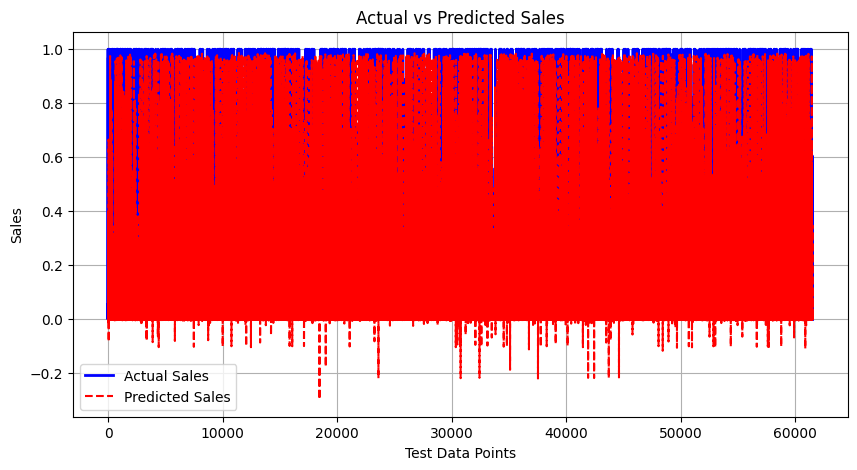

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Sales', color='blue', linewidth=2)
plt.plot(y_pred_lr, label='Predicted Sales', color='red', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Test Data Points')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

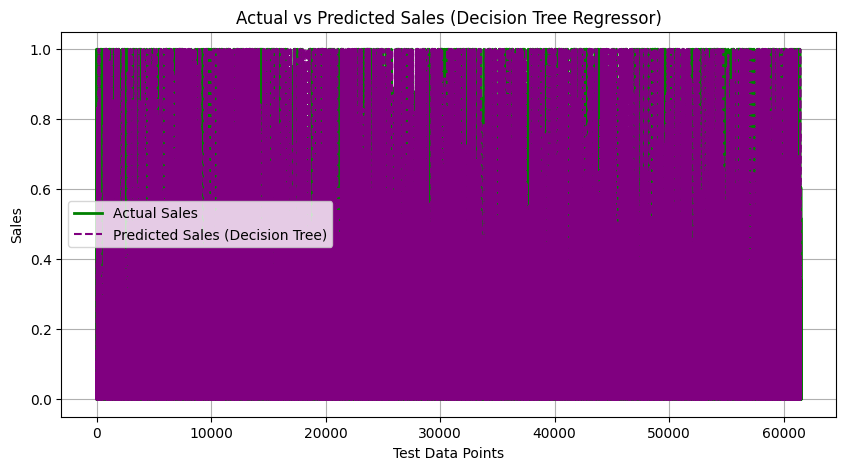

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Sales', color='green', linewidth=2)
plt.plot(y_pred_dt, label='Predicted Sales (Decision Tree)', color='purple', linestyle='--')
plt.title('Actual vs Predicted Sales (Decision Tree Regressor)')
plt.xlabel('Test Data Points')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

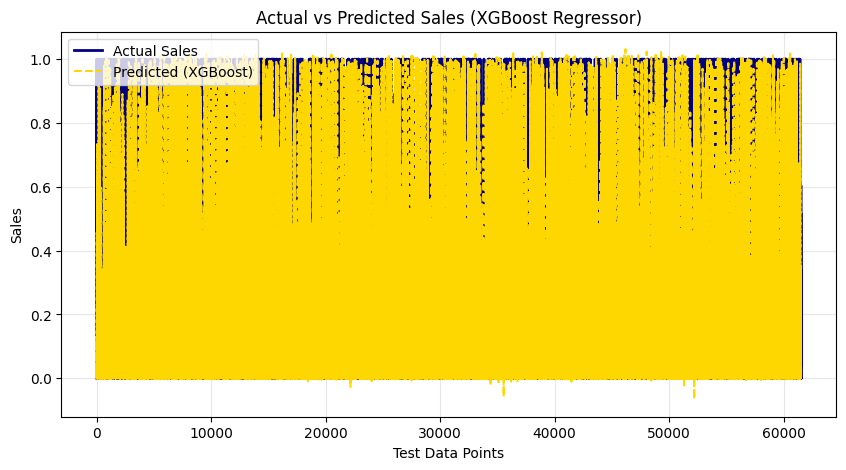

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Sales', color='navy', linewidth=2)
plt.plot(y_pred_xgb, label='Predicted (XGBoost)', color='gold', linestyle='--', linewidth=1.5)
plt.title('Actual vs Predicted Sales (XGBoost Regressor)')
plt.xlabel('Test Data Points')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

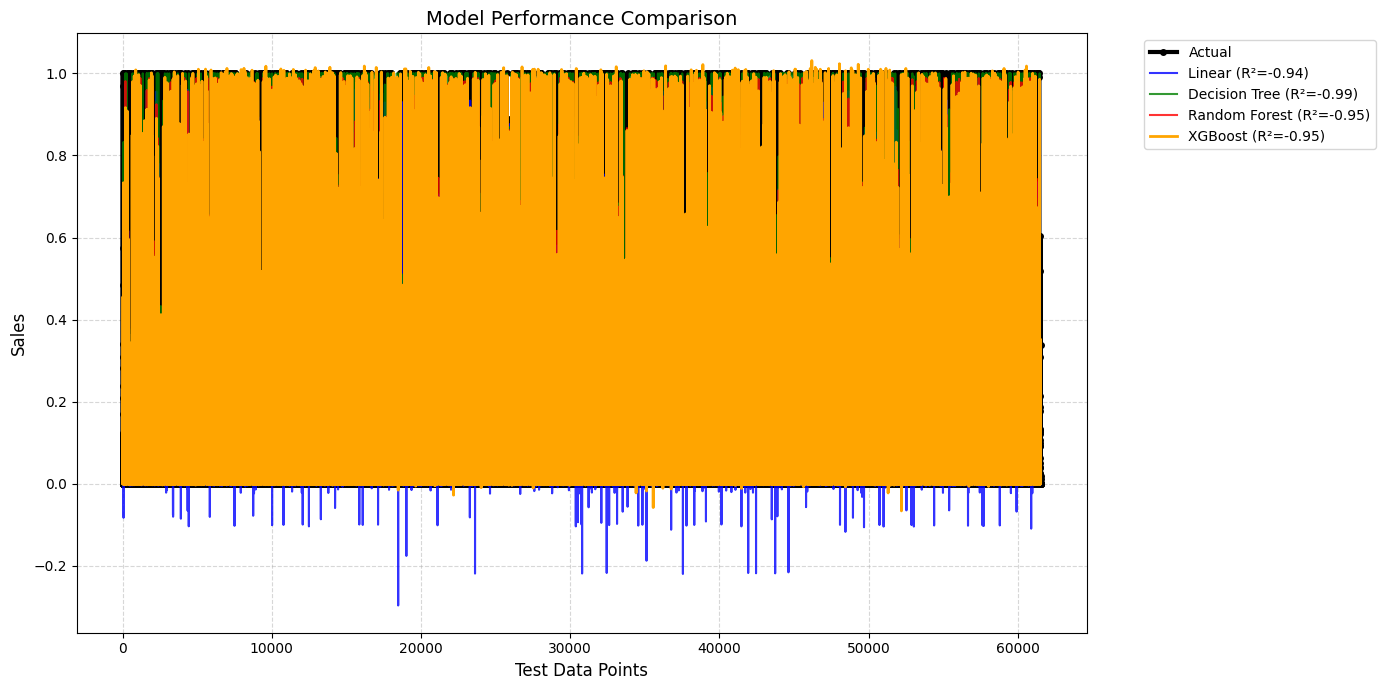

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual', color='black', linewidth=3, marker='o', markersize=4)
plt.plot(y_pred_lr, label=f'Linear (R²={r2_score(y_test, y_pred_lr):.2f})', color='blue', alpha=0.8)
plt.plot(y_pred_dt, label=f'Decision Tree (R²={r2_score(y_test, y_pred_dt):.2f})', color='green', alpha=0.8)
plt.plot(y_pred_rf, label=f'Random Forest (R²={r2_score(y_test, y_pred_rf):.2f})', color='red', alpha=0.8)
plt.plot(y_pred_xgb, label=f'XGBoost (R²={r2_score(y_test, y_pred_xgb):.2f})', color='orange', linewidth=2)

plt.title('Model Performance Comparison', fontsize=14)
plt.xlabel('Test Data Points', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()